# Decision Tree Example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
df=sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
df['species']=df['species'].map({'setosa':0,'versicolor':1,'virginica':2})

In [10]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=2)
classifier.fit(df.iloc[:,:-1],df.iloc[:,-1])

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [27]:
from sklearn import tree

[Text(446.4, 906.0, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(223.2, 543.6, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(669.5999999999999, 543.6, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(446.4, 181.19999999999993, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(892.8, 181.19999999999993, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]')]

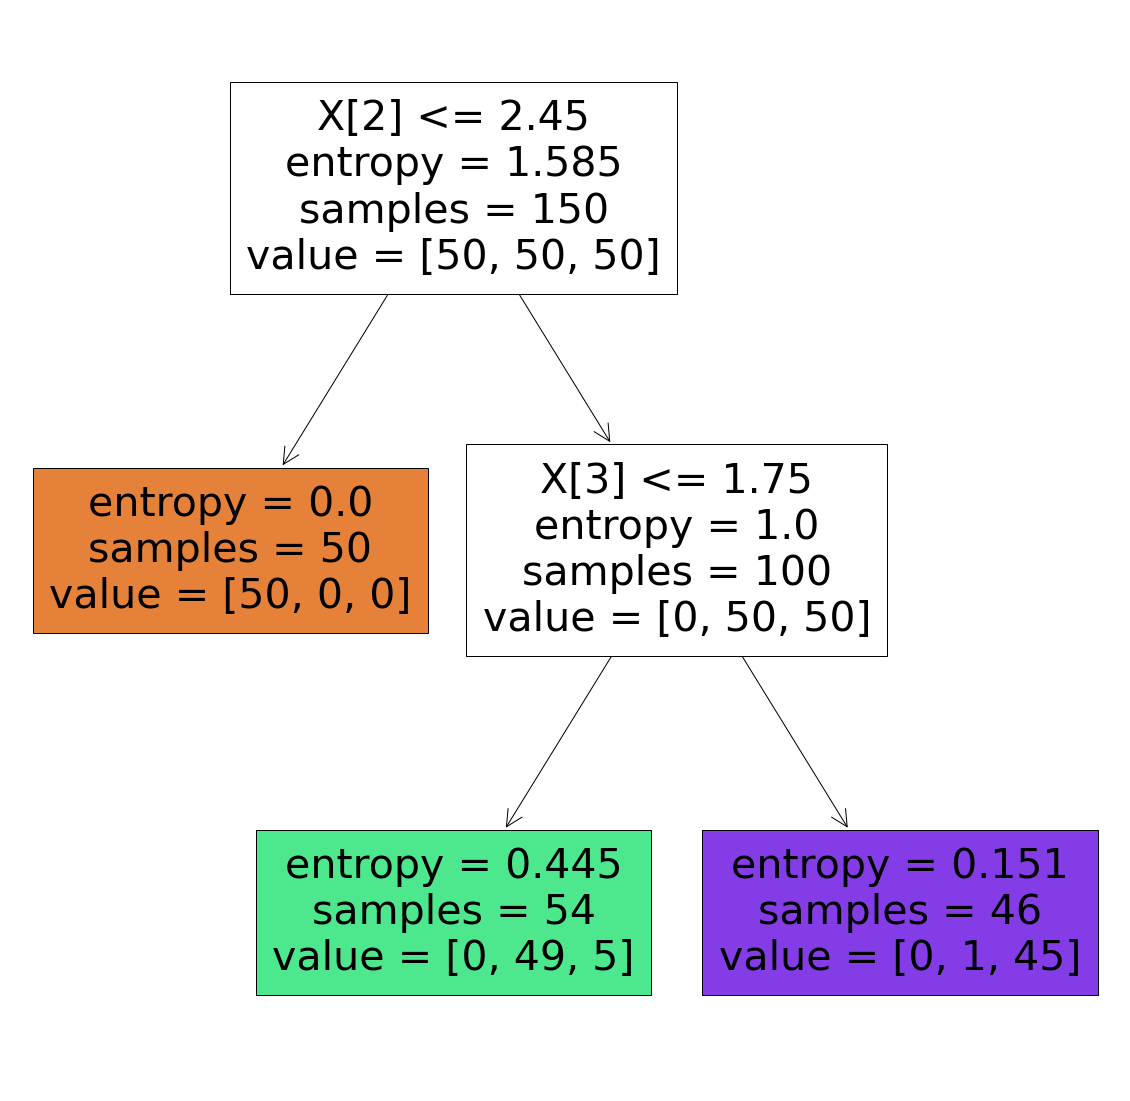

In [28]:
plt.figure(figsize=(20,20))
tree.plot_tree(classifier,filled=True)

In [31]:
df1=sns.load_dataset('iris')

In [32]:
df1['species']=df1['species'].map({'setosa':0,'versicolor':1,'virginica':2})

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
classifier_preproning=DecisionTreeClassifier()

In [39]:
parameter = {
    'criterion' : ['gini','entropy'],
    'max_depth' :[1,2,3,4,5,6,7],
    'min_samples_split': [2,5,7,8,10]
    
}



In [42]:
classifier_prep=GridSearchCV(estimator=classifier_preproning,param_grid=parameter,cv=5)
classifier_prep.fit(df1.iloc[:,:-1],df1.iloc[:,-1])

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 5, 7, 8, 10]})

In [43]:
classifier_prep.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 5}

In [44]:
classifier_prep.best_score_

0.9733333333333334

In [48]:
m1 = DecisionTreeClassifier(criterion= 'gini', max_depth= 3, min_samples_split= 5)

In [49]:
m1.fit(df1.iloc[:,:-1],df1.iloc[:,-1])

DecisionTreeClassifier(max_depth=3, min_samples_split=5)

[Text(418.5, 951.3000000000001, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(279.0, 679.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(558.0, 679.5, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(279.0, 407.70000000000005, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(139.5, 135.89999999999998, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(418.5, 135.89999999999998, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(837.0, 407.70000000000005, 'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(697.5, 135.89999999999998, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(976.5, 135.89999999999998, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

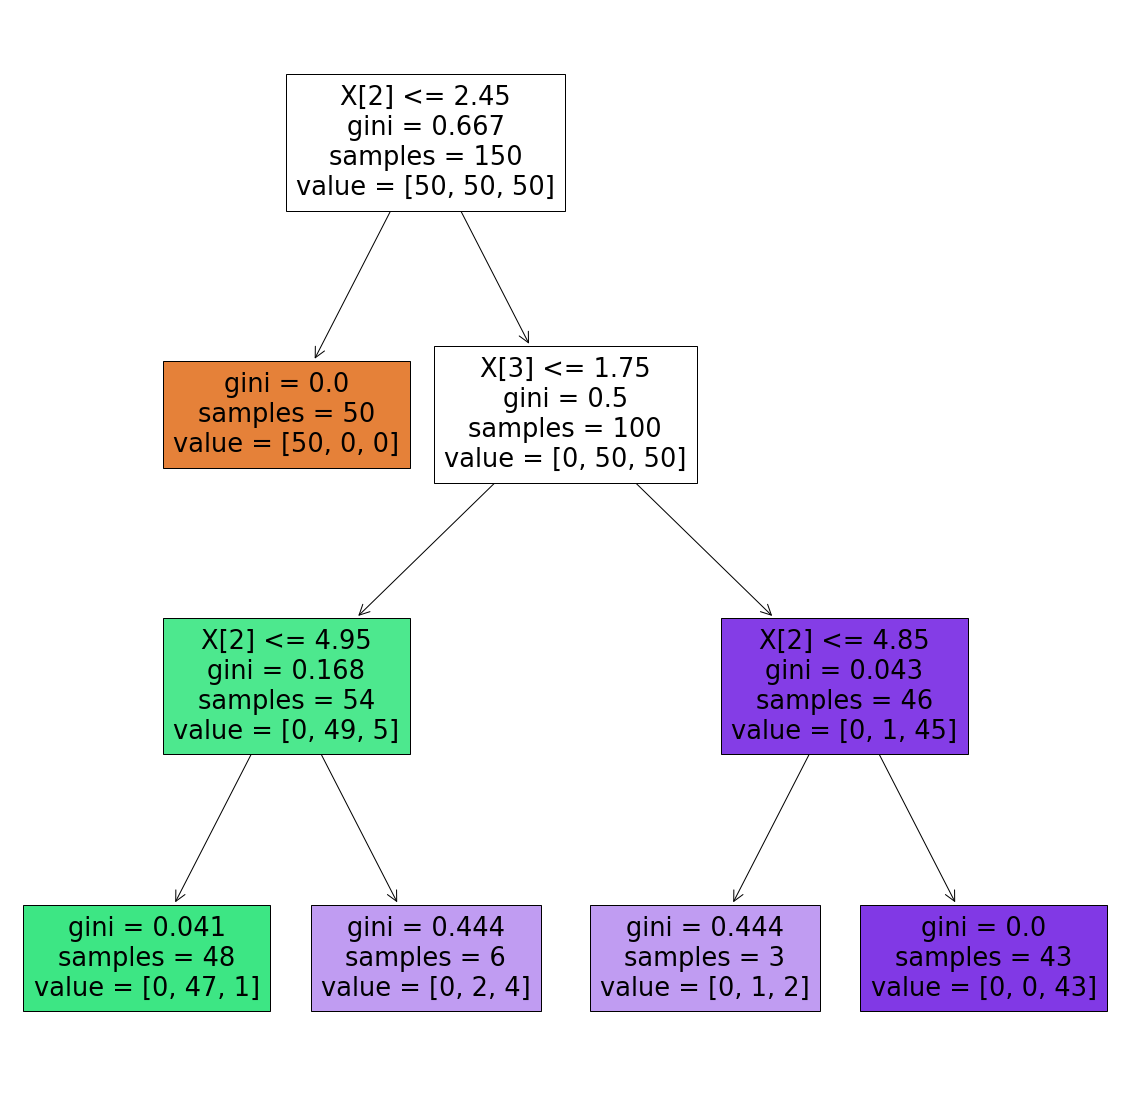

In [50]:
plt.figure(figsize=(20,20))
tree.plot_tree(m1,filled=True)